<font size='10'>Opinions of Medical Facilities: A Regional Comparison</font><br>
<font size='6'>Companion Notebook</font>

<font size='4'>WGU MSDA Program D214 - Charles G. Rowe 006539689</font>

In [1]:
import os
import pandas as pd

directory = os.chdir("G:\My Drive\Capstone Files\Datasets")

<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
C:\Users\charlesrowe\AppData\Local\Temp\ipykernel_14388\1295670377.py:4: SyntaxWarning: invalid escape sequence '\M'
  directory = os.chdir("G:\My Drive\Capstone Files\Datasets")


In [2]:
df = pd.read_csv("full.csv")
df.columns

Index(['Unnamed: 0', 'Author', 'Review Text', 'Review Rating', 'Date',
       'Owner Answer', 'Owner Answer Date', 'Author Profile', 'Author Image',
       'Review URL', 'label', 'zip', 'spill1', 'spill2', 'spill3', 'spill4',
       'spill5', 'spill7', 'spill7.1', 'spill8', 'state'],
      dtype='object')

In [3]:
df = df.drop(columns=["spill1","spill2","spill3","spill4","spill5","spill7","spill7.1","spill8"])
df.columns

Index(['Unnamed: 0', 'Author', 'Review Text', 'Review Rating', 'Date',
       'Owner Answer', 'Owner Answer Date', 'Author Profile', 'Author Image',
       'Review URL', 'label', 'zip', 'state'],
      dtype='object')

In [4]:
num_missing_vals = df.isna().sum()
num_missing_vals

Unnamed: 0                2
Author                    9
Review Text           24595
Review Rating             2
Date                      2
Owner Answer         118405
Owner Answer Date    118405
Author Profile            2
Author Image              2
Review URL                2
label                     2
zip                       2
state                     2
dtype: int64

In [5]:
num_missing_reviews = df['Review Text'].isna().sum()
num_missing_reviews

24595

In [6]:
df = df.dropna(subset=['Review Text'])
df.columns

Index(['Unnamed: 0', 'Author', 'Review Text', 'Review Rating', 'Date',
       'Owner Answer', 'Owner Answer Date', 'Author Profile', 'Author Image',
       'Review URL', 'label', 'zip', 'state'],
      dtype='object')

In [7]:
num_missing_reviews = df['Review Text'].isna().sum()
num_missing_reviews

0

In [8]:
num_missing_replies = df['Owner Answer'].isna().sum()
num_missing_replies

101024

In [9]:
df['Owner Answer'] = df["Owner Answer"].fillna('no answer')
num_missing_replies = df['Owner Answer'].isna().sum()
num_missing_replies

0

In [10]:
df['Owner Answer Date'] = df["Owner Answer Date"].fillna('no date')
num_missing_replies = df['Owner Answer Date'].isna().sum()
num_missing_replies

0

In [11]:
df['Author'] = df["Author"].fillna('anonymous')
num_missing_replies = df['Author'].isna().sum()
num_missing_replies

0

In [12]:
num_missing_vals = df.isna().sum()
num_missing_vals

Unnamed: 0           0
Author               0
Review Text          0
Review Rating        0
Date                 0
Owner Answer         0
Owner Answer Date    0
Author Profile       0
Author Image         0
Review URL           0
label                0
zip                  0
state                0
dtype: int64

In [13]:
df.to_csv("cleaned_full_df.csv")
df = pd.read_csv("cleaned_full_df.csv")
df.dtypes

Unnamed: 0.1           int64
Unnamed: 0           float64
Author                object
Review Text           object
Review Rating        float64
Date                  object
Owner Answer          object
Owner Answer Date     object
Author Profile        object
Author Image          object
Review URL            object
label                 object
zip                  float64
state                 object
dtype: object

In [14]:
df2 = pd.read_csv("new_data.csv")

df2 = df2.drop(columns=["spill1","spill2","spill3","spill4","spill5","spill6","spill7"])
df2.columns

Index(['Unnamed: 0', 'Author', 'Review Text', 'Review Rating', 'Date',
       'Owner Answer', 'Owner Answer Date', 'Author Profile', 'Author Image',
       'Review URL', 'label', 'zip', 'state'],
      dtype='object')

In [15]:
num_missing_vals = df2.isna().sum()
num_missing_vals

Unnamed: 0              0
Author                  0
Review Text          1185
Review Rating           0
Date                    0
Owner Answer         6377
Owner Answer Date    6377
Author Profile          0
Author Image            0
Review URL              0
label                   0
zip                     0
state                   0
dtype: int64

In [16]:
num_missing_reviews = df2['Review Text'].isna().sum()
num_missing_reviews

1185

In [17]:
df2 = df2.dropna(subset=['Review Text'])
num_missing_reviews = df2['Review Text'].isna().sum()
num_missing_reviews

0

In [18]:
num_missing_replies = df2['Owner Answer'].isna().sum()
num_missing_replies

5684

In [19]:
df2['Owner Answer'] = df2["Owner Answer"].fillna('no answer')
num_missing_replies = df2['Owner Answer'].isna().sum()
num_missing_replies

0

In [20]:
df2['Owner Answer Date'] = df2["Owner Answer Date"].fillna('no date')
num_missing_replies = df2['Owner Answer Date'].isna().sum()
num_missing_replies

0

In [21]:
df2['Author'] = df2["Author"].fillna('anonymous')
num_missing_replies = df2['Author'].isna().sum()
num_missing_replies

0

In [22]:
num_missing_vals = df2.isna().sum()
num_missing_vals

Unnamed: 0           0
Author               0
Review Text          0
Review Rating        0
Date                 0
Owner Answer         0
Owner Answer Date    0
Author Profile       0
Author Image         0
Review URL           0
label                0
zip                  0
state                0
dtype: int64

In [23]:
df2.to_csv("cleaned_full_df2.csv")
df2 = pd.read_csv("cleaned_full_df2.csv")
df2.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Author               object
Review Text          object
Review Rating         int64
Date                 object
Owner Answer         object
Owner Answer Date    object
Author Profile       object
Author Image         object
Review URL           object
label                object
zip                   int64
state                object
dtype: object

In [24]:
import numpy as np
df['has owner answer'] = np.where(df["Owner Answer"] != "no answer", '1', '0')
df2['has owner answer'] = np.where(df2["Owner Answer"] != "no answer", '1', '0')

In [25]:
df['has owner answer']

0         1
1         1
2         1
3         1
4         1
         ..
208426    0
208427    0
208428    0
208429    0
208430    0
Name: has owner answer, Length: 208431, dtype: object

In [26]:
df2['has owner answer']

0        1
1        1
2        1
3        1
4        1
        ..
13964    0
13965    0
13966    1
13967    1
13968    0
Name: has owner answer, Length: 13969, dtype: object

In [27]:
df['state'].unique()

array(['District of Columbia', 'Virginia', 'Maryland', 'Hawaii', 'Alaska',
       'California', 'New York', 'Nevada', 'Oregon', 'Pennsylvania',
       'Washington', 'Arizona', 'Florida', 'Utah', 'Idaho', 'Montana',
       'Colorado', 'New Mexico', 'Texas', 'Oklahoma', 'Kansas',
       'Missouri', 'Nebraska', 'South Dakota', 'North Dakota',
       'Minnesota', 'Iowa', 'Wisconsin', 'Michigan', 'Alabama', 'Indiana',
       'Illinois', 'Arkansas', 'Lousiana', 'Louisiana', 'Mississippi',
       'Kentucky', 'Tennessee', 'Georgia', 'South Carolina',
       'North Carolina', 'Maine', 'Vermont', 'New Hampshire',
       'Massachusetts', 'Rhode Island', 'Connecticut', 'New Jersey',
       'Delaware', 'Ohio', 'West Virginia', 'Wyoming'], dtype=object)

In [28]:
df.replace('Lousiana','Louisiana',inplace=True)
df['state'].value_counts()

state
Tennessee               9360
New Jersey              8522
Pennsylvania            8177
South Carolina          7902
North Carolina          7308
New York                6997
Alabama                 6080
Georgia                 5949
Maryland                5808
Kentucky                5737
Texas                   5712
Missouri                5613
Washington              5186
Connecticut             5185
Ohio                    5135
Illinois                4982
Michigan                4808
Florida                 4793
Arkansas                4699
Arizona                 4601
Nevada                  4545
West Virginia           4396
California              4098
Utah                    4095
Wisconsin               3990
Massachusetts           3936
Mississippi             3843
Virginia                3732
New Mexico              3633
Oregon                  3374
Nebraska                3309
Idaho                   3288
Maine                   2942
Wyoming                 2927
South Da

In [29]:
df2['state'].unique()

array(['California', 'Arizona', 'Montana', 'Oregon', 'Alaska', 'Wyoming',
       'New Mexico', 'Colorado'], dtype=object)

In [30]:
df2['state'].value_counts()

state
Arizona       3864
Colorado      3261
New Mexico    2952
California    1931
Montana       1455
Oregon         360
Wyoming        129
Alaska          17
Name: count, dtype: int64

In [31]:
df = pd.concat([df,df2],ignore_index=True)

df['census region'] = np.where((df['state'] == 'Maine')|(df['state'] == 'New Hampshire')|(df['state'] == 'Vermont')|(df['state'] == 'Massachusetts')|
                              (df['state'] == 'Connecticut')|(df['state'] == 'Rhode Island')|(df['state'] == 'New York')|(df['state'] == 'Pennsylvania')|
                              (df['state'] == 'New Jersey'),'northeast',np.where((df['state'] == 'Delaware')|(df['state'] == 'Maryland')|(df['state'] == 'District of Columbia')|
                              (df['state'] == 'Virginia')|(df['state'] == 'West Virginia')|(df['state'] == 'Kentucky')|(df['state'] == 'Tennessee')|(df['state'] == 'North Carolina')|
                              (df['state'] == 'South Carolina')|(df['state'] == 'Georgia')|(df['state'] == 'Florida')|(df['state'] == 'Alabama')|(df['state'] == 'Mississippi')|
                              (df['state'] == 'Louisiana')|(df['state'] == 'Oklahoma')|(df['state'] == 'Arkansas')|(df['state'] == 'Texas'),'southern',
                              np.where((df['state'] == 'Michigan')|(df['state'] == 'Ohio')|(df['state'] == 'Indiana')|(df['state'] == 'Illinois')|(df['state'] == 'Wisconsin')|
                              (df['state'] == 'Missouri')|(df['state'] == 'Iowa')|(df['state'] == 'Minnesota')|(df['state'] == 'North Dakota')|(df['state'] == 'South Dakota')|
                              (df['state'] == 'Nebraska')|(df['state'] == 'Kansas'),'midwest',np.where((df['state'] == 'Montana')|(df['state'] == 'Wyoming')|(df['state'] == 'Colorado')|
                              (df['state'] == 'New Mexico')|(df['state'] == 'Arizona')|(df['state'] == 'Utah')|(df['state'] == 'Idaho')|(df['state'] == 'Nevada')|(df['state'] == 'Washington')|
                              (df['state'] == 'Oregon')|(df['state'] == 'California')|(df['state'] == 'Alaska')|(df['state'] == 'Hawaii'),'west','?'))))

df['census region'].value_counts()

census region
southern     84537
west         55167
midwest      42584
northeast    40112
Name: count, dtype: int64

In [32]:
df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='Unnamed: 0.1')
df.dtypes

Author                object
Review Text           object
Review Rating        float64
Date                  object
Owner Answer          object
Owner Answer Date     object
Author Profile        object
Author Image          object
Review URL            object
label                 object
zip                  float64
state                 object
has owner answer      object
census region         object
dtype: object

In [33]:
df['Author'] = df["Author"].replace({"#NAME?":"anonymous"})
num_missing_replies = df['Author'].isna().sum()
num_missing_replies

0

In [34]:
def dupe_detection(column1, column2):
    dupes = df.duplicated(subset = column1, keep = False)
    duped_reviews = df[dupes].sort_values(by = column1)
    print(duped_reviews[[column1,column2]])

dupe_detection('Review Text','Author Profile')
df = df.drop_duplicates(subset=['Review Text'])
dupe_detection('Review Text','Author Profile')

df.to_csv("cleaned_full_df_with_census_regions.csv")

                                              Review Text  \
20898   "Best hospital in the state" Somehow my MRI is...   
25353   "Best hospital in the state" Somehow my MRI is...   
21731   "Capital’s unlawful collections practices prev...   
24370   "Capital’s unlawful collections practices prev...   
216971  "Not the Patient", My sister was admitted on 1...   
...                                                   ...   
153207                                                  👍   
21853   😁👍👍👍 good   nice nurse and doctors  good  bles...   
24966   😁👍👍👍 good   nice nurse and doctors  good  bles...   
40928   🤬😡01/02/2019 WHY BE IN THIS FEILD IF YOU'RE GO...   
217022  🤬😡01/02/2019 WHY BE IN THIS FEILD IF YOU'RE GO...   

                                           Author Profile  
20898   https://www.google.com/maps/contrib/1082131836...  
25353   https://www.google.com/maps/contrib/1082131836...  
21731   https://www.google.com/maps/contrib/1137279277...  
24370   https://www.google.

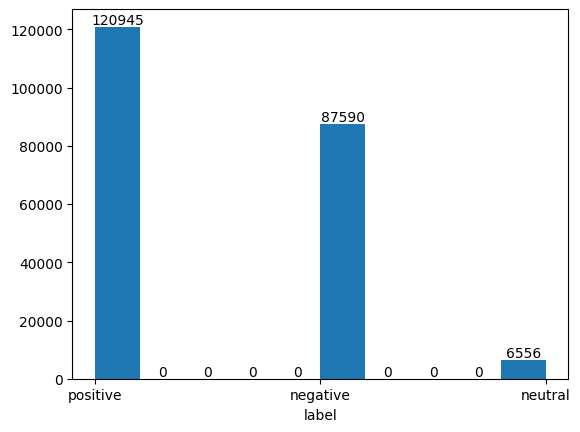

In [35]:
import matplotlib.pyplot as plt

x = df['label']
values, bins, bars = plt.hist(x)
plt.xlabel('label')
plt.bar_label(bars, fontsize=10)
plt.show()

In [36]:
cols_to_drop = df[(df['census region'] == 'northeast') | (df['census region'] == 'midwest')].index
df.drop(cols_to_drop, inplace=True)

df['census region'].value_counts()

census region
southern    83476
west        51483
Name: count, dtype: int64

In [37]:
import scipy.stats as stats
#alpha = 0.05

#region_v_label = pd.crosstab(df['census region'],df['label'],margins=True)
#chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(region_v_label)

#if p_value < alpha:
    #print("Significance Found")

#print(p_value)

In [38]:
#region_v_answer = pd.crosstab(df['census region'],df['has owner answer'],margins=True)
#chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(region_v_answer)

#if p_value < alpha:
    #print("Significance Found")

#print(p_value)

In [39]:
#label_v_answer = pd.crosstab(df['label'],df['has owner answer'],margins=True)
#chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(label_v_answer)

#if p_value < alpha:
    #print("Significance Found")

#print(p_value)

In [40]:
#three_way_contingency = pd.crosstab([df['census region'],df['label']],df['has owner answer'],margins=True)
#three_way_contingency

In [41]:
#alpha = 0.05

#chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(three_way_contingency)

#if p_value < alpha:
    #print("Significance Found")

#print(p_value)

In [42]:
#pd.crosstab(df['census region'],df['label'],margins=True)

In [43]:
#pd.crosstab(df['census region'],df['label'],margins=True,normalize='all')

In [44]:
#pd.crosstab(df['census region'],df['label'],margins=True,normalize='columns')

In [45]:
#pd.crosstab(df['census region'],df['label'],margins=True,normalize='index')

In [46]:
#pd.crosstab(df['label'],df['has owner answer'],margins=True)

In [47]:
#pd.crosstab(df['label'],df['has owner answer'],margins=True, normalize='all')

In [48]:
#pd.crosstab(df['label'],df['has owner answer'],margins=True,normalize='columns')

In [49]:
#pd.crosstab(df['label'],df['has owner answer'],margins=True,normalize='index')

In [50]:
#pd.crosstab([df['census region'],df['label']],df['has owner answer'],margins=True)

In [51]:
#pd.crosstab([df['census region'],df['label']],df['has owner answer'],margins=True, normalize='all')

In [52]:
#pd.crosstab([df['census region'],df['label']],df['has owner answer'],margins=True, normalize='index')

In [53]:
#pd.crosstab([df['census region'],df['label']],df['has owner answer'],margins=True, normalize='columns')

In [54]:
import demoji
import re

def remove_emoji(string):
    return demoji.replace(string, '')

def remove_extra_spaces(string):
    return re.sub(r'\s{2,}',' ',str(string))

df['cleaned text'] = df['Review Text'].apply(remove_emoji)
df['cleaned text'] = df['cleaned text'].apply(remove_extra_spaces)

df['cleaned text'].head()


0    MedStar Navy Yard is my new go-to for urgent h...
1    Dr. Kalra is a very good Doctor. He's all abou...
2    Dr. Janelle Leuschen is knowledgeable, patient...
3    Very efficient operation - making an appointme...
4    Everything from check in to Dr. visit to lab w...
Name: cleaned text, dtype: object

In [55]:
'''
Uses code from Ednalyn C. De Dios (2022)
https://github.com/ecdedios/d213-advanced-data-analytics/blob/main/task2/notebooks/D213%20Performance%20Assessment%20Task%202%20(Rev.%200)-Copy2.ipynb
and
William J. Townsend (2022)
https://github.com/WJTownsend/WGU_Portfolio/blob/main/D213/d213task2.ipynb
and
Charles G. Rowe (2025)
https://github.com/CGRowe96/WGU_MSDA/blob/main/D213/Task%202/D213-Task2.ipynb
'''

import nltk
import string
import unicodedata
import nltk.corpus
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_sentence(sentence):
    stops = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ['...',' - ', 'ca', 'wo', "'s", "'ing","'ll", "'re"]
    negation = ['but', 'not', "don't", "aren't", "couldn't", "doesn't", "hadn't", "hasn't", "haven't", 
                  "isn't", "shouldn't", "wouldn't"]
    for word in negation:
        stops.remove(word)
    sentence = (unicodedata.normalize('NFKD', sentence)
        .encode('ascii', 'ignore')
        .decode('utf-8', 'ignore')
        .lower())
    words = re.sub(r'[^\w\s]', '', sentence).split()
    word_list = [word for word in words if word not in stops]
    return word_list

def get_words(df, column):
    return clean_sentence(''.join(str(df[column].tolist())))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\charlesrowe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\charlesrowe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\charlesrowe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\charlesrowe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
#mask = df['census region'] == 'southern'
#south_df = df[mask]
#south_df

In [57]:
#west_df = df[~mask]
#west_df

In [58]:
'''all_words = get_words(df, 'cleaned text')
all_freq = pd.Series(all_words).value_counts()
vocab_size = len(all_freq)

print('Vocabulary size: ' + str(vocab_size))'''

"all_words = get_words(df, 'cleaned text')\nall_freq = pd.Series(all_words).value_counts()\nvocab_size = len(all_freq)\n\nprint('Vocabulary size: ' + str(vocab_size))"

In [59]:
'''pos_mask = df['label'] == 'positive'
neg_mask = df['label'] == 'negative'
neu_mask = df['label'] == 'neutral'

all_pos_words = df[pos_mask]
all_neg_words = df[neg_mask]
all_neu_words = df[neu_mask]

a_pos_word_list = get_words(all_pos_words, 'cleaned text')
a_neg_word_list = get_words(all_neg_words, 'cleaned text')
a_neu_word_list = get_words(all_neu_words, 'cleaned text')

a_pos_word_freq = pd.Series(a_pos_word_list).value_counts()
a_neg_word_freq = pd.Series(a_neg_word_list).value_counts()
a_neu_word_freq = pd.Series(a_neu_word_list).value_counts()

word_counts_df = (pd.concat([all_freq, a_pos_word_freq, a_neg_word_freq, a_neu_word_freq],
                            axis=1, sort=True).set_axis(['all','pos','neg','neu'], axis=1)
                            .apply(lambda s: s.astype(str)))

word_counts_df.fillna(0)
word_counts_df.sort_values(by='all', ascending=False).head(10)'''

"pos_mask = df['label'] == 'positive'\nneg_mask = df['label'] == 'negative'\nneu_mask = df['label'] == 'neutral'\n\nall_pos_words = df[pos_mask]\nall_neg_words = df[neg_mask]\nall_neu_words = df[neu_mask]\n\na_pos_word_list = get_words(all_pos_words, 'cleaned text')\na_neg_word_list = get_words(all_neg_words, 'cleaned text')\na_neu_word_list = get_words(all_neu_words, 'cleaned text')\n\na_pos_word_freq = pd.Series(a_pos_word_list).value_counts()\na_neg_word_freq = pd.Series(a_neg_word_list).value_counts()\na_neu_word_freq = pd.Series(a_neu_word_list).value_counts()\n\nword_counts_df = (pd.concat([all_freq, a_pos_word_freq, a_neg_word_freq, a_neu_word_freq],\n                            axis=1, sort=True).set_axis(['all','pos','neg','neu'], axis=1)\n                            .apply(lambda s: s.astype(str)))\n\nword_counts_df.fillna(0)\nword_counts_df.sort_values(by='all', ascending=False).head(10)"

In [60]:
'''all_words_south = get_words(south_df, 'cleaned text')
all_freq_south = pd.Series(all_words_south).value_counts()
vocab_size_south = len(all_freq_south)

print('Vocabulary size: ' + str(vocab_size_south))'''

"all_words_south = get_words(south_df, 'cleaned text')\nall_freq_south = pd.Series(all_words_south).value_counts()\nvocab_size_south = len(all_freq_south)\n\nprint('Vocabulary size: ' + str(vocab_size_south))"

In [61]:
'''pos_mask = south_df['label'] == 'positive'
neg_mask = south_df['label'] == 'negative'
neu_mask = south_df['label'] == 'neutral'

south_pos_words = south_df[pos_mask]
south_neg_words = south_df[neg_mask]
south_neu_words = south_df[neu_mask]

s_pos_word_list = get_words(south_pos_words, 'cleaned text')
s_neg_word_list = get_words(south_neg_words, 'cleaned text')
s_neu_word_list = get_words(south_neu_words, 'cleaned text')

s_pos_word_freq = pd.Series(s_pos_word_list).value_counts()
s_neg_word_freq = pd.Series(s_neg_word_list).value_counts()
s_neu_word_freq = pd.Series(s_neu_word_list).value_counts()

word_counts_df = (pd.concat([all_freq_south, s_pos_word_freq, s_neg_word_freq, s_neu_word_freq],
                            axis=1, sort=True).set_axis(['all','pos','neg','neu'], axis=1)
                            .apply(lambda s: s.astype(str)))

word_counts_df.fillna(0)
word_counts_df.sort_values(by='all', ascending=False).head(10)'''

"pos_mask = south_df['label'] == 'positive'\nneg_mask = south_df['label'] == 'negative'\nneu_mask = south_df['label'] == 'neutral'\n\nsouth_pos_words = south_df[pos_mask]\nsouth_neg_words = south_df[neg_mask]\nsouth_neu_words = south_df[neu_mask]\n\ns_pos_word_list = get_words(south_pos_words, 'cleaned text')\ns_neg_word_list = get_words(south_neg_words, 'cleaned text')\ns_neu_word_list = get_words(south_neu_words, 'cleaned text')\n\ns_pos_word_freq = pd.Series(s_pos_word_list).value_counts()\ns_neg_word_freq = pd.Series(s_neg_word_list).value_counts()\ns_neu_word_freq = pd.Series(s_neu_word_list).value_counts()\n\nword_counts_df = (pd.concat([all_freq_south, s_pos_word_freq, s_neg_word_freq, s_neu_word_freq],\n                            axis=1, sort=True).set_axis(['all','pos','neg','neu'], axis=1)\n                            .apply(lambda s: s.astype(str)))\n\nword_counts_df.fillna(0)\nword_counts_df.sort_values(by='all', ascending=False).head(10)"

In [62]:
'''all_words_west = get_words(west_df, 'cleaned text')
all_freq_west = pd.Series(all_words_west).value_counts()
vocab_size_west = len(all_freq_west)

print('Vocabulary size: ' + str(vocab_size_west))'''

"all_words_west = get_words(west_df, 'cleaned text')\nall_freq_west = pd.Series(all_words_west).value_counts()\nvocab_size_west = len(all_freq_west)\n\nprint('Vocabulary size: ' + str(vocab_size_west))"

In [63]:
'''pos_mask = west_df['label'] == 'positive'
neg_mask = west_df['label'] == 'negative'
neu_mask = west_df['label'] == 'neutral'

west_pos_words = west_df[pos_mask]
west_neg_words = west_df[neg_mask]
west_neu_words = west_df[neu_mask]

w_pos_word_list = get_words(west_pos_words, 'cleaned text')
w_neg_word_list = get_words(west_neg_words, 'cleaned text')
w_neu_word_list = get_words(west_neu_words, 'cleaned text')

w_pos_word_freq = pd.Series(w_pos_word_list).value_counts()
w_neg_word_freq = pd.Series(w_neg_word_list).value_counts()
w_neu_word_freq = pd.Series(w_neu_word_list).value_counts()

word_counts_df = (pd.concat([all_freq_west, w_pos_word_freq, w_neg_word_freq, w_neu_word_freq],
                            axis=1, sort=True).set_axis(['all','pos','neg','neu'], axis=1)
                            .apply(lambda s: s.astype(str)))

word_counts_df.fillna(0)
word_counts_df.sort_values(by='all', ascending=False).head(10)'''

"pos_mask = west_df['label'] == 'positive'\nneg_mask = west_df['label'] == 'negative'\nneu_mask = west_df['label'] == 'neutral'\n\nwest_pos_words = west_df[pos_mask]\nwest_neg_words = west_df[neg_mask]\nwest_neu_words = west_df[neu_mask]\n\nw_pos_word_list = get_words(west_pos_words, 'cleaned text')\nw_neg_word_list = get_words(west_neg_words, 'cleaned text')\nw_neu_word_list = get_words(west_neu_words, 'cleaned text')\n\nw_pos_word_freq = pd.Series(w_pos_word_list).value_counts()\nw_neg_word_freq = pd.Series(w_neg_word_list).value_counts()\nw_neu_word_freq = pd.Series(w_neu_word_list).value_counts()\n\nword_counts_df = (pd.concat([all_freq_west, w_pos_word_freq, w_neg_word_freq, w_neu_word_freq],\n                            axis=1, sort=True).set_axis(['all','pos','neg','neu'], axis=1)\n                            .apply(lambda s: s.astype(str)))\n\nword_counts_df.fillna(0)\nword_counts_df.sort_values(by='all', ascending=False).head(10)"

In [64]:
'''
Uses code from Ednalyn C. De Dios (2022)
https://github.com/ecdedios/d213-advanced-data-analytics/blob/main/task2/notebooks/D213%20Performance%20Assessment%20Task%202%20(Rev.%200)-Copy2.ipynb
'''

'''def get_bigrams(words):
    return (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

def get_trigrams(words):
    return (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

def get_qualgrams(words):
    return (pd.Series(nltk.ngrams(words, 4)).value_counts())[:20]

def viz_bigrams(df, column, title):
    get_bigrams(get_words(df,column)).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title(title)
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

def viz_trigrams(df, column, title):
    get_trigrams(get_words(df,column)).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title(title)
    plt.ylabel('Trigram')
    plt.xlabel('# Occurances')
    
def viz_qualgrams(df, column, title):
    get_qualgrams(get_words(df,column)).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title(title)
    plt.ylabel('Qualgram')
    plt.xlabel('# Occurances')'''

"def get_bigrams(words):\n    return (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]\n\ndef get_trigrams(words):\n    return (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]\n\ndef get_qualgrams(words):\n    return (pd.Series(nltk.ngrams(words, 4)).value_counts())[:20]\n\ndef viz_bigrams(df, column, title):\n    get_bigrams(get_words(df,column)).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))\n\n    plt.title(title)\n    plt.ylabel('Bigram')\n    plt.xlabel('# Occurances')\n\ndef viz_trigrams(df, column, title):\n    get_trigrams(get_words(df,column)).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))\n\n    plt.title(title)\n    plt.ylabel('Trigram')\n    plt.xlabel('# Occurances')\n\ndef viz_qualgrams(df, column, title):\n    get_qualgrams(get_words(df,column)).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))\n\n    plt.title(title)\n    plt.ylabel('Qualgram')\n    plt.xlabel('# Occurances')"

In [65]:
#viz_bigrams(df,'cleaned text','Most Frequent Bigrams (All)')

In [66]:
#viz_trigrams(df,'cleaned text','Most Frequent Trigrams (All)')

In [67]:
#viz_qualgrams(df,'cleaned text','Most Frequent Qualgrams (All)')

In [68]:
#viz_bigrams(south_df,'cleaned text','Most Frequent Bigrams (South)')

In [69]:
#viz_trigrams(south_df,'cleaned text','Most Frequent Trigrams (South)')

In [70]:
#viz_qualgrams(south_df,'cleaned text','Most Frequent Qualgrams (South)')

In [71]:
#viz_bigrams(west_df,'cleaned text','Most Frequent Bigrams (West)')

In [72]:
#viz_trigrams(west_df,'cleaned text','Most Frequent Trigrams (West)')

In [73]:
#viz_qualgrams(west_df,'cleaned text','Most Frequent Qualgrams (West)')

In [74]:
'''
Uses code from GeekForGeeks (2022)
https://www.geeksforgeeks.org/nlp-word-collocations/
'''

'''from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

stopset = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ['...',' - ', 'ca', 'wo', "'s", "'ing","'ll", "'re"]
filter_stops = lambda w: len(w) < 3 or w in stopset

def get_bi_collocations(list):
    list_col = [a.lower() for a in list]
    biagram_collocation = BigramCollocationFinder.from_words(list_col)
    biagram_collocation.apply_word_filter(filter_stops)
    biagram_collocation.apply_freq_filter(3)
    return biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15)

def get_tri_collocation(list):
    list_col = [a.lower() for a in list]
    trigram_collocation = TrigramCollocationFinder.from_words(list_col)
    trigram_collocation.apply_word_filter(filter_stops)
    trigram_collocation.apply_freq_filter(3)
    return trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 15)'''

'from nltk.collocations import BigramCollocationFinder\nfrom nltk.metrics import BigramAssocMeasures\nfrom nltk.collocations import TrigramCollocationFinder\nfrom nltk.metrics import TrigramAssocMeasures\n\nstopset = nltk.corpus.stopwords.words(\'english\') + list(string.punctuation) + [\'...\',\' - \', \'ca\', \'wo\', "\'s", "\'ing","\'ll", "\'re"]\nfilter_stops = lambda w: len(w) < 3 or w in stopset\n\ndef get_bi_collocations(list):\n    list_col = [a.lower() for a in list]\n    biagram_collocation = BigramCollocationFinder.from_words(list_col)\n    biagram_collocation.apply_word_filter(filter_stops)\n    biagram_collocation.apply_freq_filter(3)\n    return biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15)\n\ndef get_tri_collocation(list):\n    list_col = [a.lower() for a in list]\n    trigram_collocation = TrigramCollocationFinder.from_words(list_col)\n    trigram_collocation.apply_word_filter(filter_stops)\n    trigram_collocation.apply_freq_filter(3)\n    return 

In [75]:
#get_bi_collocations(all_words)

In [76]:
#get_tri_collocation(all_words)

In [77]:
#get_bi_collocations(a_pos_word_list)

In [78]:
#get_tri_collocation(a_pos_word_list)

In [79]:
#get_bi_collocations(a_neg_word_list)

In [80]:
#get_tri_collocation(a_neg_word_list)

In [81]:
#get_bi_collocations(a_neu_word_list)

In [82]:
#get_tri_collocation(a_neu_word_list)

In [83]:
#get_bi_collocations(all_words_south)

In [84]:
#get_tri_collocation(all_words_south)

In [85]:
#get_bi_collocations(s_pos_word_list)

In [86]:
#get_tri_collocation(s_pos_word_list)

In [87]:
#get_bi_collocations(s_neg_word_list)

In [88]:
#get_tri_collocation(s_neg_word_list)

In [89]:
#get_bi_collocations(s_neu_word_list)

In [90]:
#get_tri_collocation(s_neu_word_list)

In [91]:
#get_bi_collocations(all_words_west)

In [92]:
#get_tri_collocation(all_words_west)

In [93]:
#get_bi_collocations(w_pos_word_list)

In [94]:
#get_tri_collocation(w_pos_word_list)

In [95]:
#get_bi_collocations(w_neg_word_list)

In [96]:
#get_tri_collocation(w_neg_word_list)

In [97]:
#get_bi_collocations(w_neu_word_list)

In [98]:
#get_tri_collocation(w_neu_word_list)

In [99]:
def isEnglish(c):
    try:
        c.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

non_english = []
for index, row in df.iterrows():
    for l in list(row['cleaned text']):
        for c in l:
            if isEnglish(c) == True:
                pass
            else:
                non_english.append(c)
non_english[:10]

['’', '’', '’', '’', '’', '’', '’', '’', '’', '’']

In [100]:
sentiment_df = df.drop(columns=["Author","Review Text","Date","Owner Answer","Owner Answer Date","Author Profile","Author Image","Review URL","label","zip","state","has owner answer","census region"])
sentiment_df = sentiment_df.rename(columns={'Review Rating':'label'})
sentiment_df.dtypes

label           float64
cleaned text     object
dtype: object

In [101]:
all_words_sent = get_words(sentiment_df, 'cleaned text')
all_freq_sent = pd.Series(all_words_sent).value_counts()
vocab_size_sent = len(all_freq_sent)

print('Vocabulary size: ' + str(vocab_size_sent))

max_sequence_embedding = int(round(np.sqrt(np.sqrt(vocab_size_sent)), 0))
print('Max sequence embedding: ' + str(max_sequence_embedding))

Vocabulary size: 137804
Max sequence embedding: 19


In [102]:
list_of_lens = []
for index, row in sentiment_df.iterrows():
    list_of_lens.append(len(clean_sentence(row['cleaned text'])))
sequence_length = max(list_of_lens)
print('Sequence length: ' + str(sequence_length))

Sequence length: 425


In [103]:
from sklearn.model_selection import train_test_split

X_train, X_remaining, y_train, y_remaining = train_test_split(sentiment_df['cleaned text'], sentiment_df['label'], train_size=.7, random_state = 1987)
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state = 1987) 

In [104]:
vocab_size = 137804
embedding_dim = 19
max_length = 425

In [105]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Embedding, SimpleRNN
from tensorflow.keras.models import Sequential

tokenizer = Tokenizer(num_words= 86000, lower= False)
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocab is {vocab_size} elements long.")

word_index = tokenizer.word_index
word_index

Vocab is 85434 elements long.


{'and': 1,
 'the': 2,
 'to': 3,
 'I': 4,
 'was': 5,
 'a': 6,
 'in': 7,
 'my': 8,
 'for': 9,
 'of': 10,
 'me': 11,
 'that': 12,
 'is': 13,
 'they': 14,
 'with': 15,
 'have': 16,
 'br': 17,
 'had': 18,
 'you': 19,
 'The': 20,
 'on': 21,
 'not': 22,
 'at': 23,
 'this': 24,
 'it': 25,
 'care': 26,
 'were': 27,
 'hospital': 28,
 'very': 29,
 'staff': 30,
 'be': 31,
 'her': 32,
 'so': 33,
 'all': 34,
 'are': 35,
 'but': 36,
 'there': 37,
 'she': 38,
 'an': 39,
 'They': 40,
 'as': 41,
 'time': 42,
 'from': 43,
 'get': 44,
 'out': 45,
 'would': 46,
 'been': 47,
 'room': 48,
 'we': 49,
 'nurses': 50,
 'about': 51,
 'here': 52,
 'he': 53,
 'or': 54,
 'nurse': 55,
 'My': 56,
 'ER': 57,
 'no': 58,
 'go': 59,
 'one': 60,
 'Dr': 61,
 'up': 62,
 'when': 63,
 'back': 64,
 'if': 65,
 'just': 66,
 'doctor': 67,
 'them': 68,
 'experience': 69,
 'like': 70,
 'do': 71,
 'because': 72,
 'their': 73,
 'great': 74,
 'pain': 75,
 'told': 76,
 'what': 77,
 'did': 78,
 'even': 79,
 'hours': 80,
 'by': 81,
 'who'

In [106]:
X_train_seqs = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seqs, maxlen=max_length, padding='post')
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')
X_val_seq = tokenizer.texts_to_sequences(X_valid)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post')

In [107]:
print(f"The shape of the padded reviews within the training set is {X_train_pad.shape}")
print(X_train_pad)

The shape of the padded reviews within the training set is (94471, 425)
[[ 244  244    4 ...    0    0    0]
 [3544   10  468 ...    0    0    0]
 [ 116  109  696 ...    0    0    0]
 ...
 [ 907    1  198 ...    0    0    0]
 [4480    5  362 ...    0    0    0]
 [ 431    6   55 ...    0    0    0]]


In [115]:
model = Sequential()
model.add(Input(shape=(425,)))
model.add(Embedding(vocab_size, 19))
model.add(SimpleRNN(425, activation='relu', dropout=.1, return_sequences=True))
model.add(SimpleRNN(425, activation='relu', dropout=.1))
model.add(Dense(4250, activation = "relu"))
model.add(Dense(3750, activation = "relu"))
model.add(Dense(3250, activation = "relu"))
model.add(Dense(2750, activation = "relu"))
model.add(Dense(2250, activation = "relu"))
model.add(Dense(1275, activation = "relu"))
model.add(Dense(425, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer= 'RMSprop', loss= 'mse', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 425, 19)        │     1,623,246 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 425, 425)       │       189,125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 425)            │       361,675 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4250)           │     1,810,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3750)           │    15,941,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3250)           │    12,190,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2750)           │     8,940,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2250)           │     6,189,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1275)           │     2,870,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 425)            │       542,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 50)             │        21,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,680,324 (193.33 MB)

 Trainable params: 50,680,324 (193.33 MB)

 Non-trainable params: 0 (0.00 B)

None


In [116]:
num_classes = 425
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
y_val = to_categorical(y_valid, num_classes=num_classes)
print(X_test_pad.shape)
print(X_train_pad.shape)
print(X_val_pad.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

MemoryError: Unable to allocate 127. GiB for an array with shape (39975075, 425) and data type float64

In [ ]:
import random

X_train_pad = X_train_pad.tolist()
y_train = y_train.tolist()

def pop_data(set, number):
    i = 0
    while i <= number:
        rng = random.choice(set)
        set.remove(rng)
        i+=1
    set = np.array(set)

pop_data(X_train_pad, 411)
pop_data(y_train, 411)

X_train_pad = np.array(X_train_pad)
y_train = np.array(y_train)

print(X_test_pad.shape)
print(X_train_pad.shape)
print(X_val_pad.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

X_test_pad = X_test_pad.reshape(6748,425,3)
X_train_pad = X_train_pad.reshape(31353,425,3)
y_train = y_train.reshape(31353,425,3)
y_test = y_test.reshape(6748,425,3)
X_val_pad = X_val_pad.reshape(6748,425,3)
y_val = y_val.reshape(6748,425,3)

print(X_test_pad.shape)
print(X_train_pad.shape)
print(y_train.shape)
print(y_test.shape)

KeyboardInterrupt: 

In [ ]:
early_stop_check = EarlyStopping(monitor='accuracy', patience=3)
results = model.fit(X_train_pad, y_train, validation_data = (X_val_pad, y_val), epochs=15, callbacks=early_stop_check)

Epoch 1/15


c:\Users\charlesrowe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['sequential/simple_rnn/simple_rnn_cell/kernel', 'sequential/simple_rnn/simple_rnn_cell/recurrent_kernel', 'sequential/simple_rnn/simple_rnn_cell/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


980/980 ━━━━━━━━━━━━━━━━━━━━ 2622s 3s/step - accuracy: 0.3976 - loss: 111178096.0000 - val_accuracy: 0.9953 - val_loss: 3144420352.0000
Epoch 2/15
980/980 ━━━━━━━━━━━━━━━━━━━━ 2557s 3s/step - accuracy: 0.3370 - loss: 14527492096.0000 - val_accuracy: 0.9953 - val_loss: 123708358656.0000
Epoch 3/15
980/980 ━━━━━━━━━━━━━━━━━━━━ 2184s 2s/step - accuracy: 0.3433 - loss: 171700027392.0000 - val_accuracy: 0.0024 - val_loss: 267071913984.0000
Epoch 4/15
 17/980 ━━━━━━━━━━━━━━━━━━━━ 32:31 2s/step - accuracy: 0.4770 - loss: 724050640896.0000

KeyboardInterrupt: 